#pip install matplotlib
#pip install seaborn
#pip install geopandas

vmg

In [129]:
import pandas as pd
import locale
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')

'Spanish_Spain.1252'

In [130]:
# Cargar el archivo JSON
file_path = 'noticias_estandarizadas.json'
df = pd.read_json(file_path)

# Contar el número de registros
num_registros = len(df)
print(f'Número de registros: {num_registros}')

Número de registros: 1001


In [131]:
df_articulos_repetidos = df.groupby(['tituloarticulo']).size().reset_index(name="cantidad")
df_articulos_repetidos_orddesc = df_articulos_repetidos.sort_values(by='cantidad', ascending=False)
df_articulos_repetidos_orddesc 

,tituloarticulo,cantidad
670,NONE,32
671,NaN,9
10,'Falsos positivos': El soldado que fue asesina...,4
625,Los peligrosos delincuentes con los que Garavi...,3
601,Las pistas que sigue la Fiscalía sobre masacre...,3
...,...,...
305,Duberney Capador 'fue asesinado con tiro de gr...,1
306,Dura condena a la Nación por asesinato en resc...,1
307,Duro regaño de jueces de la JEP a Gobierno por...,1
308,Día de la Madre en 2024 registró 44 homicidios...,1


In [132]:
df

,tituloarticulo,fechaarticulo,fecha,delitos_relacionados,personas_involucradas,pais,departamento,municipio
0,Posturas enfrentadas en el caso Colmenares,2017-03-11,2017-03-11,NaN,NaN,NaN,NaN,NaN
1,Los nuevos señalamientos contra Francisco y Ca...,2017-03-20,2017-03-20,"[violación, secuestro]","[Francisco Uribe Noguera, Rafael Uribe, Rafael...",NaN,NaN,NaN
2,No hay sistematicidad en homicidios contra líd...,2017-03-20,2017-03-20,NaN,"[Villegas, Luis Carlos Villegas.\n\nEl, Plan V...",Colombia,Huila,Colombia
3,Precluye caso contra Silvia Gette por homicidi...,2017-03-27,2017-03-27,NaN,"[Silvia Guette, Édgar Ignacio Fierro, María Pa...",Colombia,Atlántico,Barranquilla
4,Madres de Soacha piden que los ‘falsos positiv...,2017-04-10,2017-04-10,NaN,"[Diego Alberto Tamayo, Gabriel Rincón Amado, J...",Colombia,Cundinamarca,Soacha
...,...,...,...,...,...,...,...,...
996,Un S.O.S. lanzó el alcalde de Quibdó (Chocó) a...,2024-09-14,2024-09-14,NaN,"[San Pacho, Gustavo Petro, Bolaños, Rafael Bol...",Colombia,Chocó,Quibdó
997,Las fotos y mensajes en poder de opositores de...,2024-09-14,2024-09-14,[secuestro],"[Iván Hernández Dala, Zerpa, Obdola, EL TIEMPO...",Colombia,Huila,Colombia
998,"Jhonier Leal, condenado por el asesinato de su...",2024-09-18,2024-09-18,NaN,"[Juanita Cárdenas Gómez, Mauricio Leal, Jhonie...",Colombia,Cesar,Valledupar
999,Víctimas de Guaviare expondrán en la JEP sus r...,2024-09-18,2023-08-15,NaN,[Laureano Narciso Moreno],Colombia,Guaviare,Sin especificar


In [133]:
#Adición de columnas para estudiar los eventros por fechas
df['fecha_formato'] = pd.to_datetime(df['fecha'])
df['anio'] = df['fecha_formato'].dt.year.astype(str)
df['semestre'] = df['fecha_formato'].dt.year.astype(str) + '-' + df['fecha_formato'].dt.month.apply(lambda x: 1 if x <= 6 else 2).astype(str)
df['trimestre'] = df['fecha_formato'].dt.year.astype(str) + '-' + df['fecha_formato'].dt.quarter.astype(str)
df['periodo'] = df['fecha'].str[:7]
df['mes'] = df['fecha_formato'].dt.strftime('%B')
df['mes_numero'] = df['fecha_formato'].dt.month
df

,tituloarticulo,fechaarticulo,fecha,delitos_relacionados,personas_involucradas,pais,departamento,municipio,fecha_formato,anio,semestre,trimestre,periodo,mes,mes_numero
0,Posturas enfrentadas en el caso Colmenares,2017-03-11,2017-03-11,NaN,NaN,NaN,NaN,NaN,2017-03-11,2017,2017-1,2017-1,2017-03,marzo,3
1,Los nuevos señalamientos contra Francisco y Ca...,2017-03-20,2017-03-20,"[violación, secuestro]","[Francisco Uribe Noguera, Rafael Uribe, Rafael...",NaN,NaN,NaN,2017-03-20,2017,2017-1,2017-1,2017-03,marzo,3
2,No hay sistematicidad en homicidios contra líd...,2017-03-20,2017-03-20,NaN,"[Villegas, Luis Carlos Villegas.\n\nEl, Plan V...",Colombia,Huila,Colombia,2017-03-20,2017,2017-1,2017-1,2017-03,marzo,3
3,Precluye caso contra Silvia Gette por homicidi...,2017-03-27,2017-03-27,NaN,"[Silvia Guette, Édgar Ignacio Fierro, María Pa...",Colombia,Atlántico,Barranquilla,2017-03-27,2017,2017-1,2017-1,2017-03,marzo,3
4,Madres de Soacha piden que los ‘falsos positiv...,2017-04-10,2017-04-10,NaN,"[Diego Alberto Tamayo, Gabriel Rincón Amado, J...",Colombia,Cundinamarca,Soacha,2017-04-10,2017,2017-1,2017-2,2017-04,abril,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Un S.O.S. lanzó el alcalde de Quibdó (Chocó) a...,2024-09-14,2024-09-14,NaN,"[San Pacho, Gustavo Petro, Bolaños, Rafael Bol...",Colombia,Chocó,Quibdó,2024-09-14,2024,2024-2,2024-3,2024-09,septiembre,9
997,Las fotos y mensajes en poder de opositores de...,2024-09-14,2024-09-14,[secuestro],"[Iván Hernández Dala, Zerpa, Obdola, EL TIEMPO...",Colombia,Huila,Colombia,2024-09-14,2024,2024-2,2024-3,2024-09,septiembre,9
998,"Jhonier Leal, condenado por el asesinato de su...",2024-09-18,2024-09-18,NaN,"[Juanita Cárdenas Gómez, Mauricio Leal, Jhonie...",Colombia,Cesar,Valledupar,2024-09-18,2024,2024-2,2024-3,2024-09,septiembre,9
999,Víctimas de Guaviare expondrán en la JEP sus r...,2024-09-18,2023-08-15,NaN,[Laureano Narciso Moreno],Colombia,Guaviare,Sin especificar,2023-08-15,2023,2023-2,2023-3,2023-08,agosto,8


In [134]:
# Obtener valores únicos en una columna específica
valores_unicos = df['fecha'].unique()
print (valores_unicos)

['2017-03-11' '2017-03-20' '2017-03-27' '2017-04-10' '2016-03-29'
 '2005-09-15' '2017-04-24' '2017-04-30' '2017-05-03' '2017-05-08'
 '1997-07-20' '2014-12-15' '2015-06-25' '2017-05-27' '2017-05-31'
 '2008-05-23' '2017-06-14' '2017-06-18' '2017-06-21' '2017-06-26'
 '2016-12-21' '2017-07-09' '2017-07-12' '2017-08-04' '2017-08-12'
 '1998-04-16' '2017-09-03' '2017-09-09' '2017-09-16' '2017-10-06'
 '2017-10-23' '2017-10-31' '2012-06-02' '2017-11-09' '1997-10-27'
 '2017-11-19' '2017-11-30' '1984-01-30' '1998-12-13' '2017-12-11'
 '2017-12-19' '2017-12-22' '2017-12-25' '2017-12-27' '2017-12-29'
 '2018-01-02' '2005-02-19' '2018-01-03' '2018-01-08' '2018-01-11'
 '2018-01-12' '2018-01-15' '2018-01-17' '2018-01-19' '2018-01-22'
 '2018-01-27' '2018-02-08' '2018-02-09' '2018-02-12' '2018-02-15'
 '2018-02-25' '1998-02-27' '2018-03-07' '2018-03-14' '2018-03-20'
 '2018-03-26' '2018-04-13' '2018-04-14' '2018-04-16' '2018-04-18'
 '2018-04-21' '2018-05-01' '2018-05-03' '2018-05-05' '2018-05-09'
 '1988-11-

---
# Análisis por Fecha del Hocidio
---

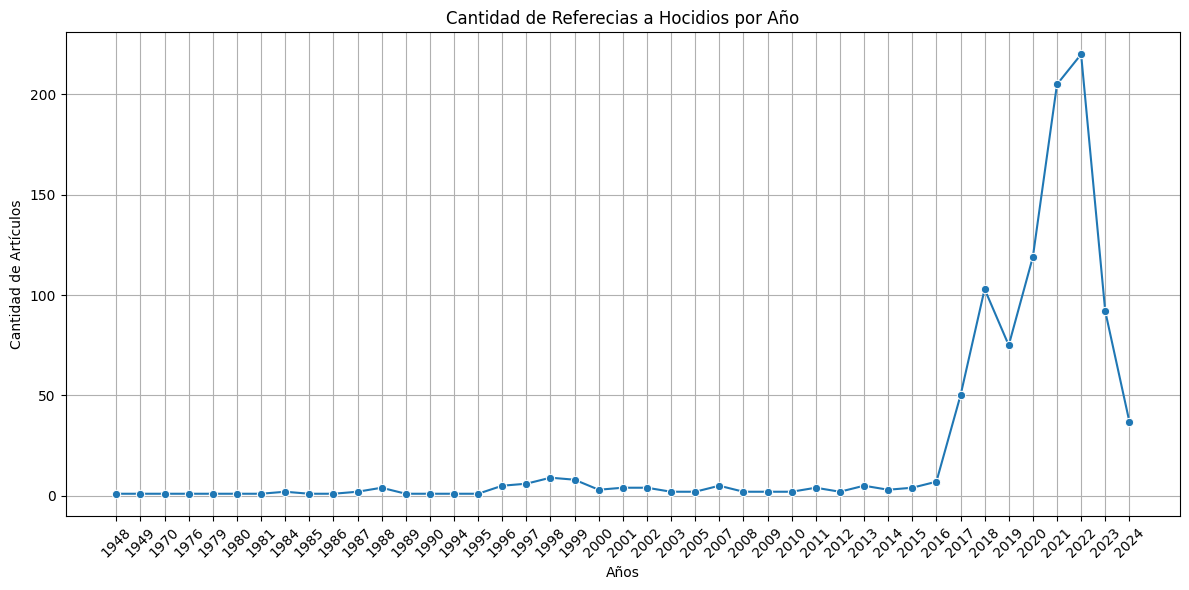

In [135]:
# Contar los registros por periodo
conteo_por_anio = df['anio'].value_counts().sort_index()
# Graficar los resultados
plt.figure(figsize=(12, 6))
sns.lineplot(x=conteo_por_anio.index, y=conteo_por_anio.values, marker='o')
plt.xlabel('Años')
plt.ylabel('Cantidad de Artículos')
plt.title('Cantidad de Referecias a Hocidios por Año')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

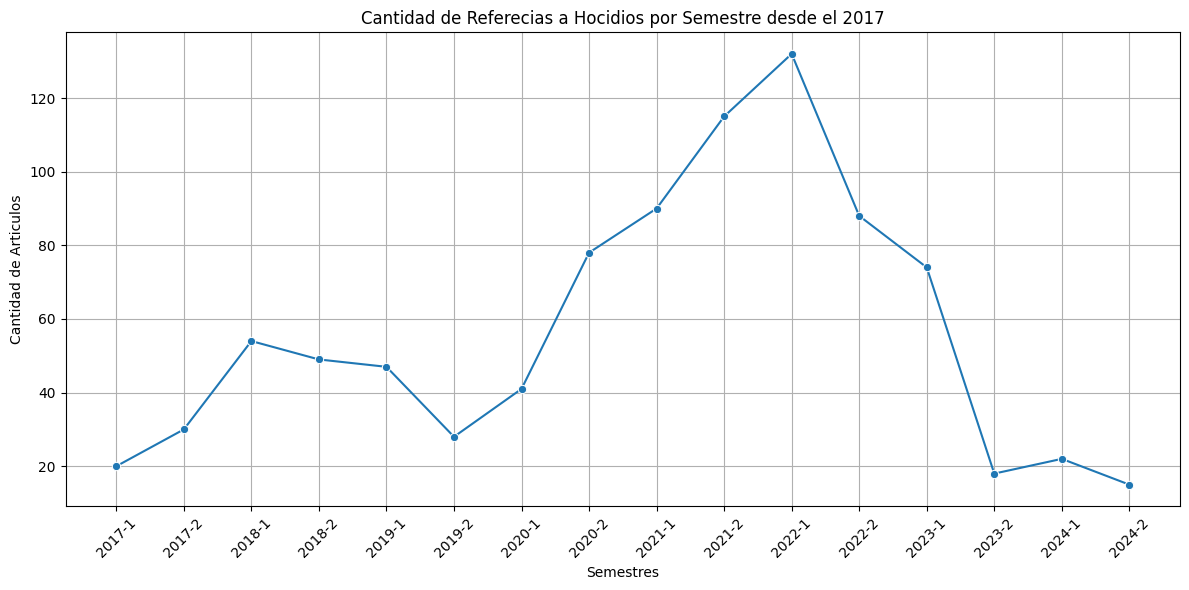

In [136]:
#filtrar los registros desde 2017
df_from2017 = df[df['fecha_formato'].dt.year >= 2017]
# Contar los registros por trimestre a partir del 2017
conteo_por_semestre = df_from2017['semestre'].value_counts().sort_index()
# Graficar los resultados
plt.figure(figsize=(12, 6))
sns.lineplot(x=conteo_por_semestre.index, y=conteo_por_semestre.values, marker='o')
plt.xlabel('Semestres')
plt.ylabel('Cantidad de Articulos')
plt.title('Cantidad de Referecias a Hocidios por Semestre desde el 2017')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

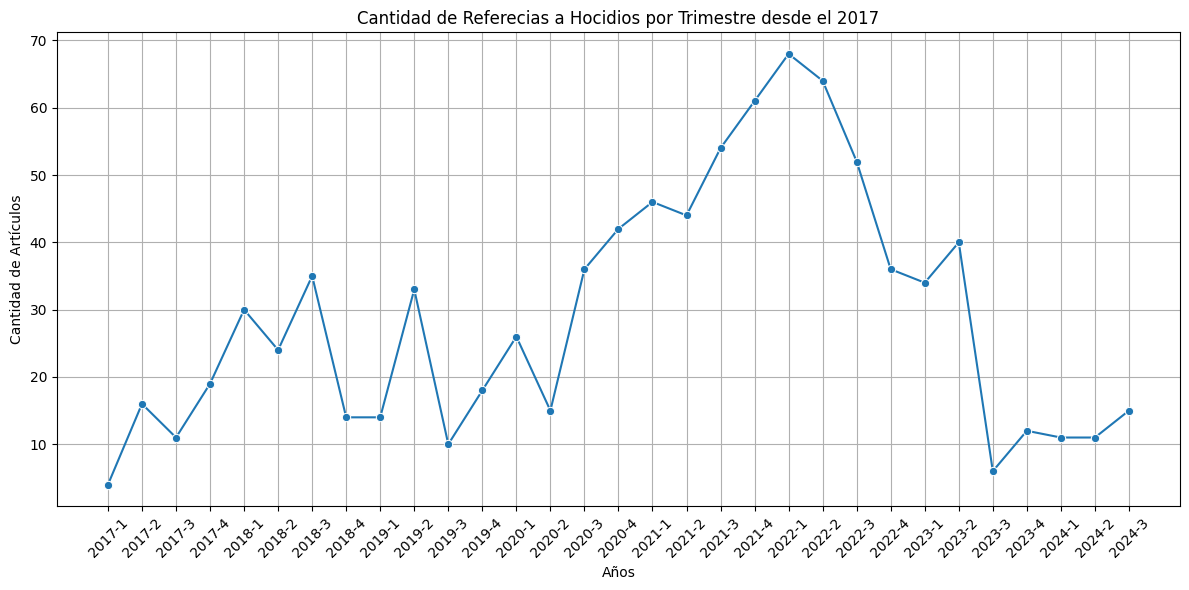

In [137]:
# Contar los registros por trimestre
conteo_por_trimestre = df_from2017['trimestre'].value_counts().sort_index()
# Graficar los resultados
plt.figure(figsize=(12, 6))
sns.lineplot(x=conteo_por_trimestre.index, y=conteo_por_trimestre.values, marker='o')
plt.xlabel('Años')
plt.ylabel('Cantidad de Artículos')
plt.title('Cantidad de Referecias a Hocidios por Trimestre desde el 2017')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Como los picos mas altos fueron en el 2022 se analiza ese año por los delitos relacionados, para también poder comparar esos meses contra el historico desde 2027

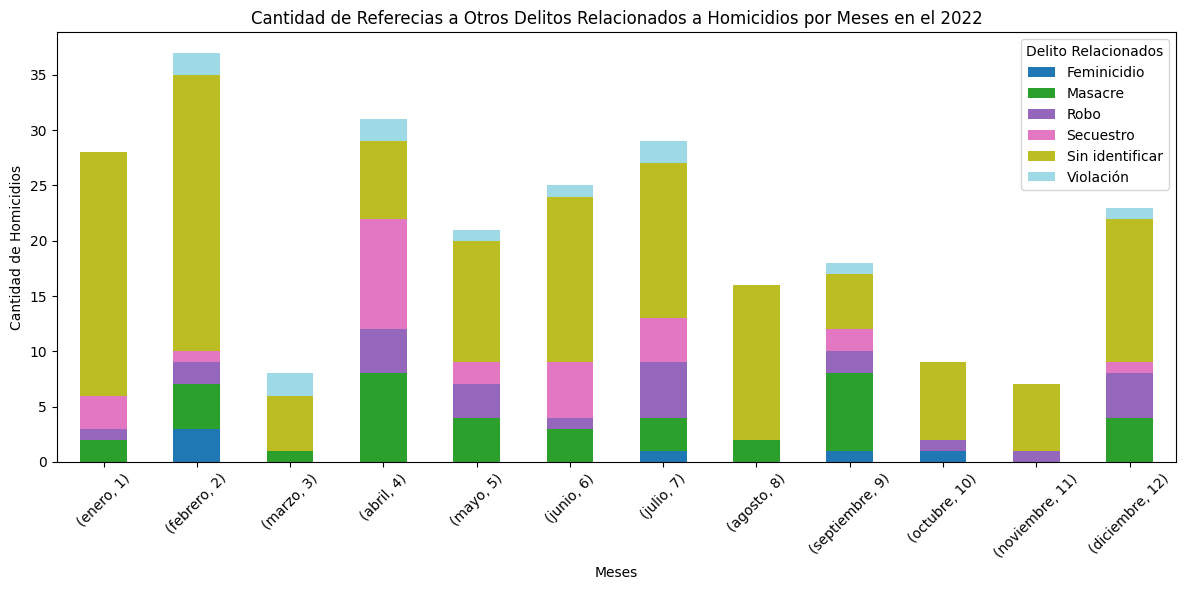

In [140]:
#filtrar los registros desde 2017
df_2022 = df[df['fecha_formato'].dt.year == 2022]
# Explode para descomponer los delitos en filas
df_explorar_otros_delitos_2022 = df_2022.explode('delitos_relacionados')
df_otros_delitos_2022_sinlistas = df_explorar_otros_delitos_2022.drop(columns=["personas_involucradas"])
df_otros_delitos_2022 = df_otros_delitos_2022_sinlistas.drop_duplicates()
df_otros_delitos_2022
#Remplazar NaN por "Sin identificar"
df_otros_delitos_2022 = df_otros_delitos_2022.fillna('Sin identificar')
# Convertir el primer carácter de cada valor en la columna 'nombre' a mayúsculas
df_otros_delitos_2022['delitos_relacionados'] = df_otros_delitos_2022['delitos_relacionados'].str.capitalize()
# Agrupar por mes y delitos relacionados
df_otros_delitos_2022_xmes = df_otros_delitos_2022.groupby(['mes','mes_numero','delitos_relacionados']).size().unstack(fill_value=0)
df_otros_delitos_2022_xmes = df_otros_delitos_2022_xmes.sort_values(by="mes_numero")

# Graficar el resultado como un gráfico de barras apiladas
df_otros_delitos_2022_xmes.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
# Configuración del gráfico
plt.xlabel('Meses')
plt.ylabel('Cantidad de Homicidios')
plt.title('Cantidad de Referecias a Otros Delitos Relacionados a Homicidios por Meses en el 2022')
plt.xticks(rotation=45)
plt.legend(title='Delito Relacionados')
plt.tight_layout()
plt.show()

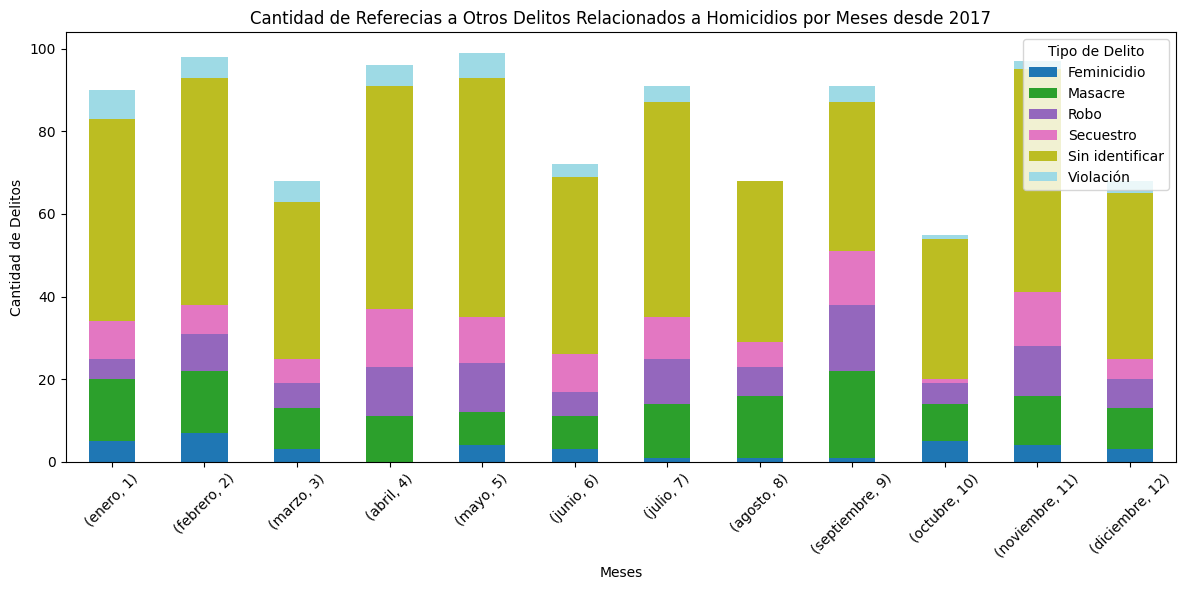

In [163]:
# # 4. Distribución geográfica a partir de 2017
# geografia_from2017_xmes = df_from2017.groupby(['mes']).size() # nose usa
# Explode para descomponer los delitos en filas
df_explorar_otros_delitos_from2017 = df_from2017.explode('delitos_relacionados')
df_from2017
df_otros_delitos_from2017_sinlistas = df_explorar_otros_delitos_from2017.drop(columns=["personas_involucradas"])
df_otros_delitos_from2017 = df_otros_delitos_from2017_sinlistas.drop_duplicates()
#Remplazar NaN por "Sin identificar"
df_otros_delitos_from2017 = df_otros_delitos_from2017.fillna('Sin identificar')
# Convertir el primer carácter de cada valor en la columna 'nombre' a mayúsculas
df_otros_delitos_from2017['delitos_relacionados'] = df_otros_delitos_from2017['delitos_relacionados'].str.capitalize()
# Agrupar por mes y delitos relacionados
df_otros_delitos_from2017_xmes = df_otros_delitos_from2017.groupby(['mes','mes_numero','delitos_relacionados']).size().unstack(fill_value=0)
df_otros_delitos_from2017_xmes = df_otros_delitos_from2017_xmes.sort_values(by="mes_numero")

# Graficar el resultado como un gráfico de barras apiladas
df_otros_delitos_from2017_xmes.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
# Configuración del gráfico
plt.xlabel('Meses')
plt.ylabel('Cantidad de Delitos')
plt.title('Cantidad de Referecias a Otros Delitos Relacionados a Homicidios por Meses desde 2017')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Delito')
plt.tight_layout()
plt.show()


Delitos Relacionados:
delitos_relacionados
Sin identificar    553
masacre            148
robo               108
secuestro          104
violación           45
feminicidio         37
Name: count, dtype: int64


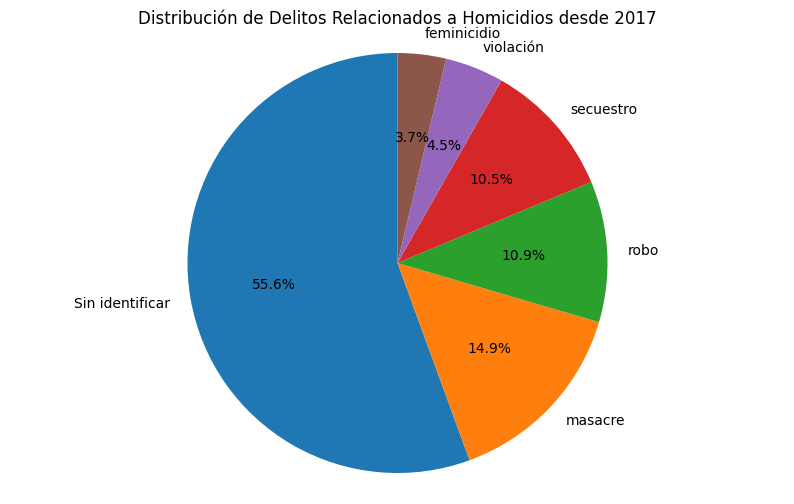

In [161]:
#Contar los Delitos: Usamos explode() para descomponer la lista de delitos y luego value_counts() para contar la frecuencia de cada delito.
# Conteo de delitos
delitos_list = df_from2017['delitos_relacionados'].explode('delitos_relacionados')  # Descomponer la lista en filas
#Remplazar NaN por "Sin identificar"
delitos_list = delitos_list.fillna('Sin identificar')
# # Convertir el primer carácter de cada valor en la columna 'nombre' a mayúsculas
# delitos_list = delitos_list['delitos_relacionados'].str.capitalize()
delitos_list
#conteo de delitos
delitos_counter = delitos_list.value_counts()

print("Delitos Relacionados:")
print(delitos_counter)

# Generar la gráfica tipo torta
plt.figure(figsize=(10, 6))
plt.pie(delitos_counter, labels=delitos_counter.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Delitos Relacionados a Homicidios desde 2017')
plt.axis('equal')  # Para asegurar que la gráfica sea un círculo
plt.show()

Distribución geográfica:


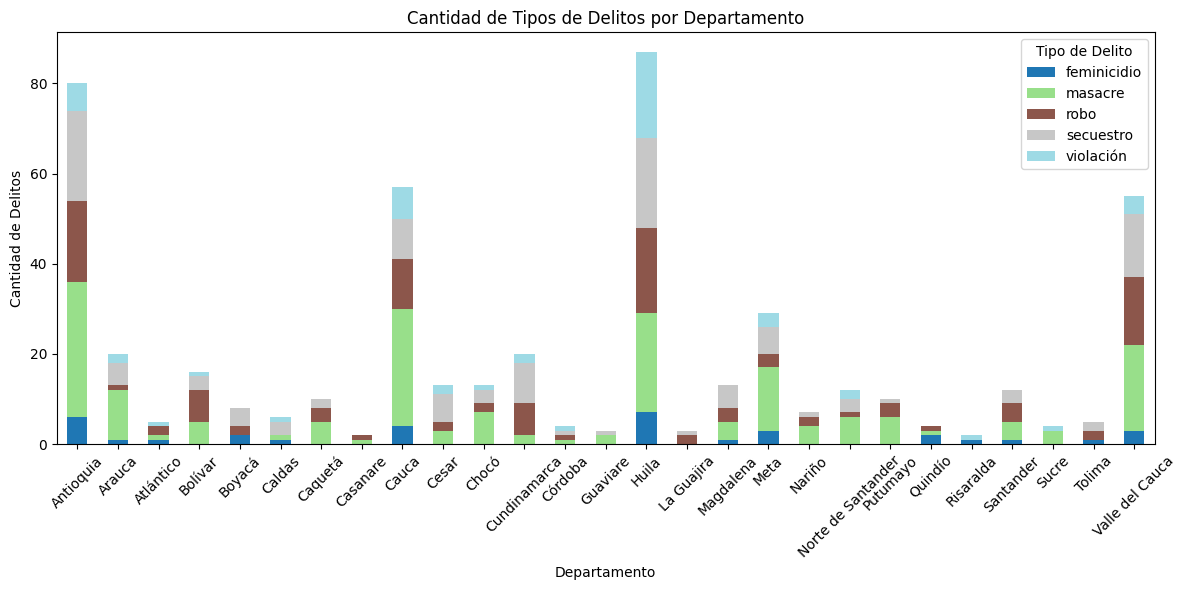

In [162]:
# 4. Distribución geográfica
geografia_counter = df.groupby(['pais', 'departamento', 'municipio']).size()

print("Distribución geográfica:")
#print(geografia_counter['Colombia'])

# Explode para descomponer los delitos en filas
df_exploded = df.explode('delitos_relacionados')

#Agrupación y Unstack:
#Usamos groupby para agrupar por departamento y delitos_relacionados, y luego usamos size() para contar los delitos.
#Unstack(fill_value=0) transforma el resultado en un DataFrame donde las columnas son los tipos de delitos y las filas son los departamentos. Los valores se llenan con 0 donde no hay delitos.
# Contar la cantidad de delitos por tipo y departamento
delitos_por_departamento = df_exploded.groupby(['departamento', 'delitos_relacionados']).size().unstack(fill_value=0)

# Graficar el resultado como un gráfico de barras apiladas
delitos_por_departamento.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Configuración del gráfico
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Delitos')
plt.title('Cantidad de Tipos de Delitos por Departamento')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Delito')
plt.tight_layout()
plt.show()
